In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [3]:
df = pd.read_csv('uber.csv')

df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
df.dropna(inplace=True)

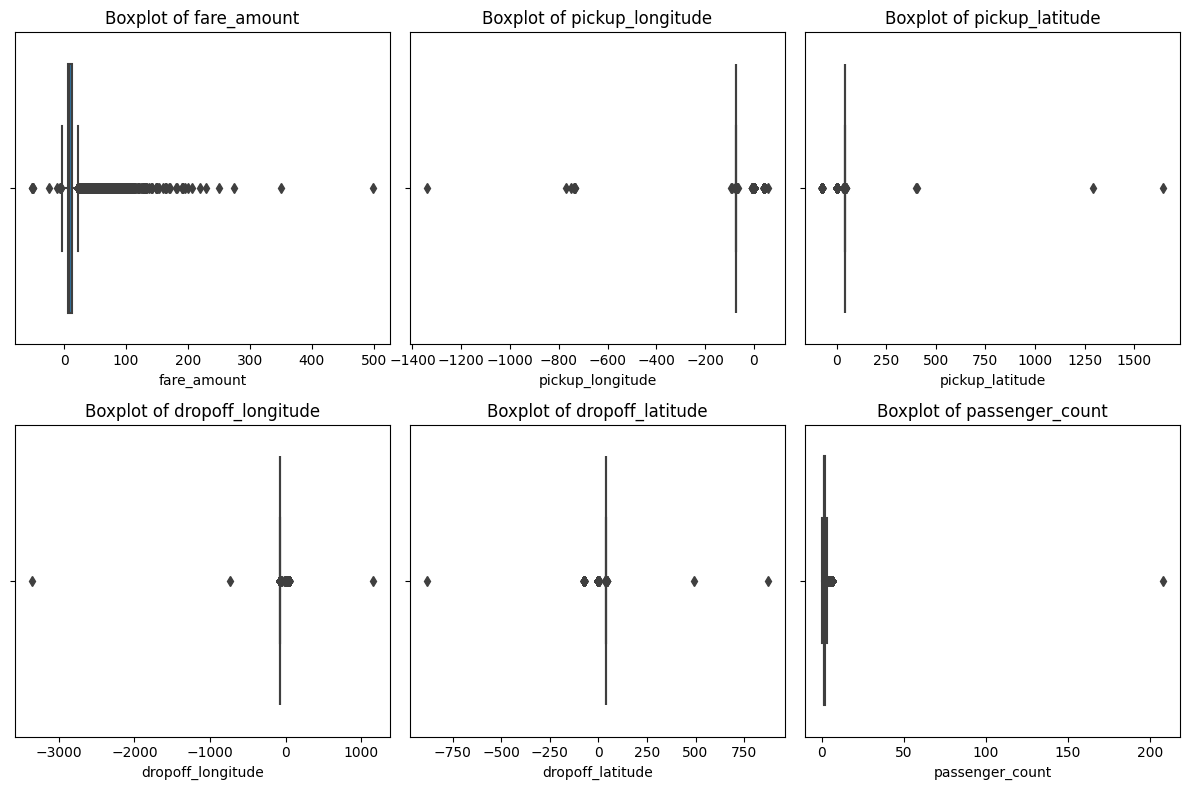

In [5]:
numeric_columns = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

plt.figure(figsize=(12,8))
for i,col in enumerate(numeric_columns,1):
        plt.subplot(2,3,i)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [15]:
z_scores = np.abs(stats.zscore(df[numeric_columns]))

threshold = 3

outlier = np.where(z_scores > threshold)

data = df.drop(df.index[outlier[0]])
data


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [11]:
X = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = data['fare_amount']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [16]:
correlation_matrix = data[numeric_columns].corr()
print(correlation_matrix['fare_amount'])

fare_amount          1.000000
pickup_longitude     0.100237
pickup_latitude     -0.039070
dropoff_longitude    0.142500
dropoff_latitude    -0.053332
passenger_count      0.005740
Name: fare_amount, dtype: float64


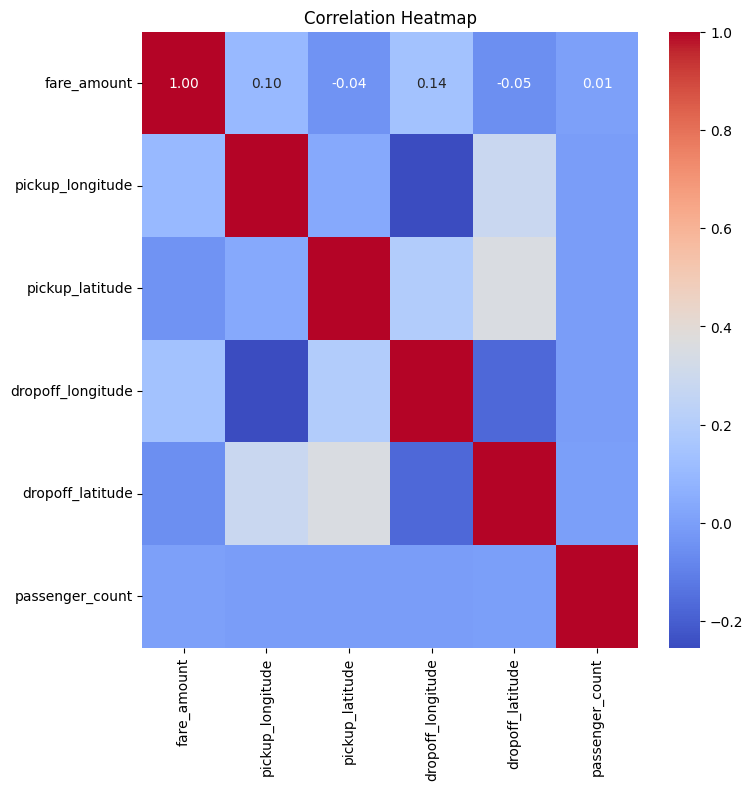

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [18]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [19]:
linear_preds = linear_reg.predict(X_test)

In [20]:
linear_reg_r2 = r2_score(y_test,linear_preds)
linear_reg_rmse = np.sqrt(mean_absolute_error(y_test,linear_preds))

In [22]:
rf_reg = RandomForestRegressor(n_estimators=50, random_state=4)
rf_reg.fit(X_train,y_train)
rf_reg_preds = rf_reg.predict(X_test)
rf_reg_r2 = r2_score(y_test,rf_reg_preds)

In [25]:
rf_reg_rmse = np.sqrt(mean_absolute_error(y_test,rf_reg_preds))
print(f'{linear_reg_r2} {linear_reg_rmse} {rf_reg_r2} {rf_reg_rmse}')

0.06403658365522547 2.1177496474393265 0.8110432271513646 1.346797260101827
